In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_csv('employee_experience_survey_data.csv')

# Set display options for better formatting
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Use full width of the display
pd.set_option('display.max_rows', 10)  # Show up to 10 rows
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimal places

# Display the first few rows with improved formatting
print("First few rows of the dataset:")
styled_df = df.head().style.set_properties(**{'text-align': 'left'})
styled_df = styled_df.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
display(styled_df)

# Display basic information about the dataset
print("\nDataset Information:")
df.info()

First few rows of the dataset:


,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name                              15 non-null     object
 1   Age Bracket                       15 non-null     object
 2   Gender                            15 non-null     object
 3   Ethnicity                         15 non-null     object
 4   Job Title                         15 non-null     object
 5   Department                        15 non-null     object
 6   Date Survey Completed             15 non-null     object
 7   Job Satisfaction                  15 non-null     object
 8   Work-Life Balance                 15 non-null     object
 9   Management Support                15 non-null     object
 10  Team Collaboration                15 non-null     object
 11  Workload Fairness                 15 non-null     object
 12  Ca

In [2]:
def likert_to_numeric(value):
    mapping = {
        'Strongly Disagree': 1,
        'Disagree': 2,
        'Neutral': 3,
        'Agree': 4,
        'Strongly Agree': 5
    }
    return mapping.get(value, np.nan)

# Apply the function to all Likert scale columns
likert_columns = ['Job Satisfaction', 'Work-Life Balance', 'Management Support', 
                  'Team Collaboration', 'Workload Fairness', 'Career Development Opportunities', 
                  'Workplace Inclusivity', 'Company Communication', 'Compensation Satisfaction', 
                  'Job Security', 'Overall Engagement']

for col in likert_columns:
    df[col + '_Numeric'] = df[col].apply(likert_to_numeric)

# Display the first few rows of the updated dataframe
print(df[['Job Satisfaction', 'Job Satisfaction_Numeric']].head())

  Job Satisfaction  Job Satisfaction_Numeric
0         Disagree                         2
1            Agree                         4
2          Neutral                         3
3          Neutral                         3
4            Agree                         4


In [24]:
# Set pandas display options for better formatting
pd.set_option('display.float_format', '{:.2f}'.format)

# Descriptive statistics for Overall Engagement and Job Satisfaction
desc_stats = df[['Overall Engagement_Numeric', 'Job Satisfaction_Numeric']].describe()

# Calculate mode separately as it's not included in describe()
mode_overall = df['Overall Engagement_Numeric'].mode().values[0]
mode_job_sat = df['Job Satisfaction_Numeric'].mode().values[0]

# Add mode to the descriptive statistics
desc_stats.loc['Mode'] = [mode_overall, mode_job_sat]

# Rename the columns for clarity
desc_stats.columns = ['Overall Engagement', 'Job Satisfaction']

print("\nDescriptive Statistics:")
print(desc_stats.to_string())
print("-" * 60)


Descriptive Statistics:
       Overall Engagement  Job Satisfaction
count               15.00             15.00
mean                 3.40              3.00
std                  1.30              1.31
min                  1.00              1.00
25%                  2.50              2.00
50%                  3.00              3.00
75%                  4.50              4.00
max                  5.00              5.00
Mode                 3.00              2.00
------------------------------------------------------------


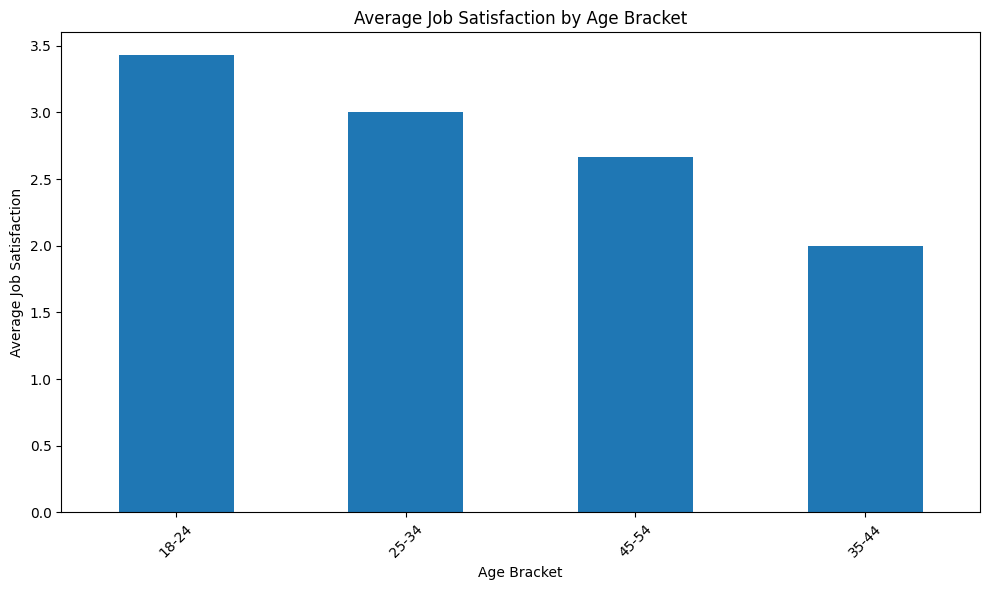

In [5]:
# Average satisfaction by age bracket
age_satisfaction = df.groupby('Age Bracket')['Job Satisfaction_Numeric'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
age_satisfaction.plot(kind='bar')
plt.title('Average Job Satisfaction by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

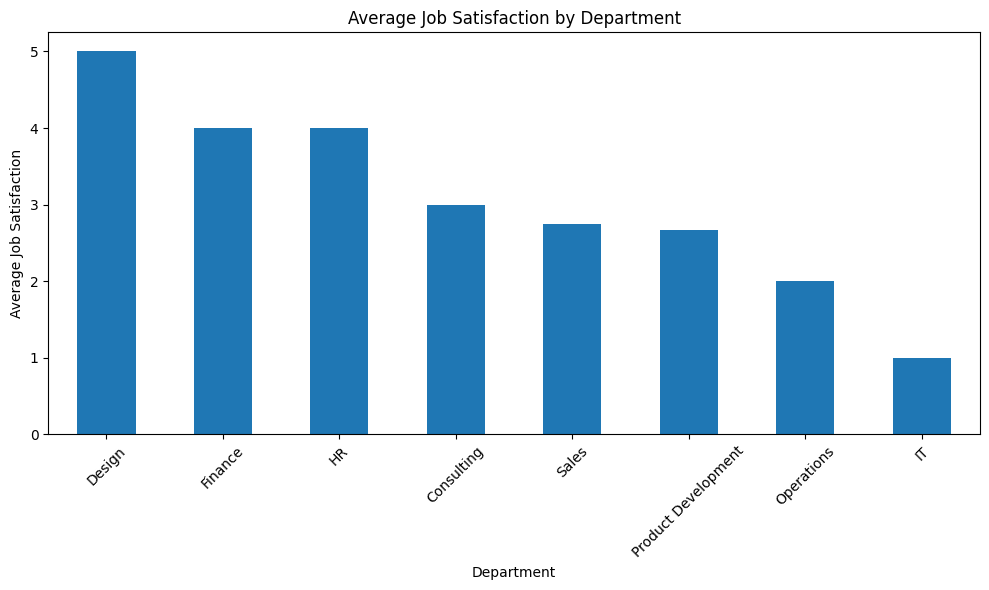

In [6]:
# Average satisfaction by department
dept_satisfaction = df.groupby('Department')['Job Satisfaction_Numeric'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
dept_satisfaction.plot(kind='bar')
plt.title('Average Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

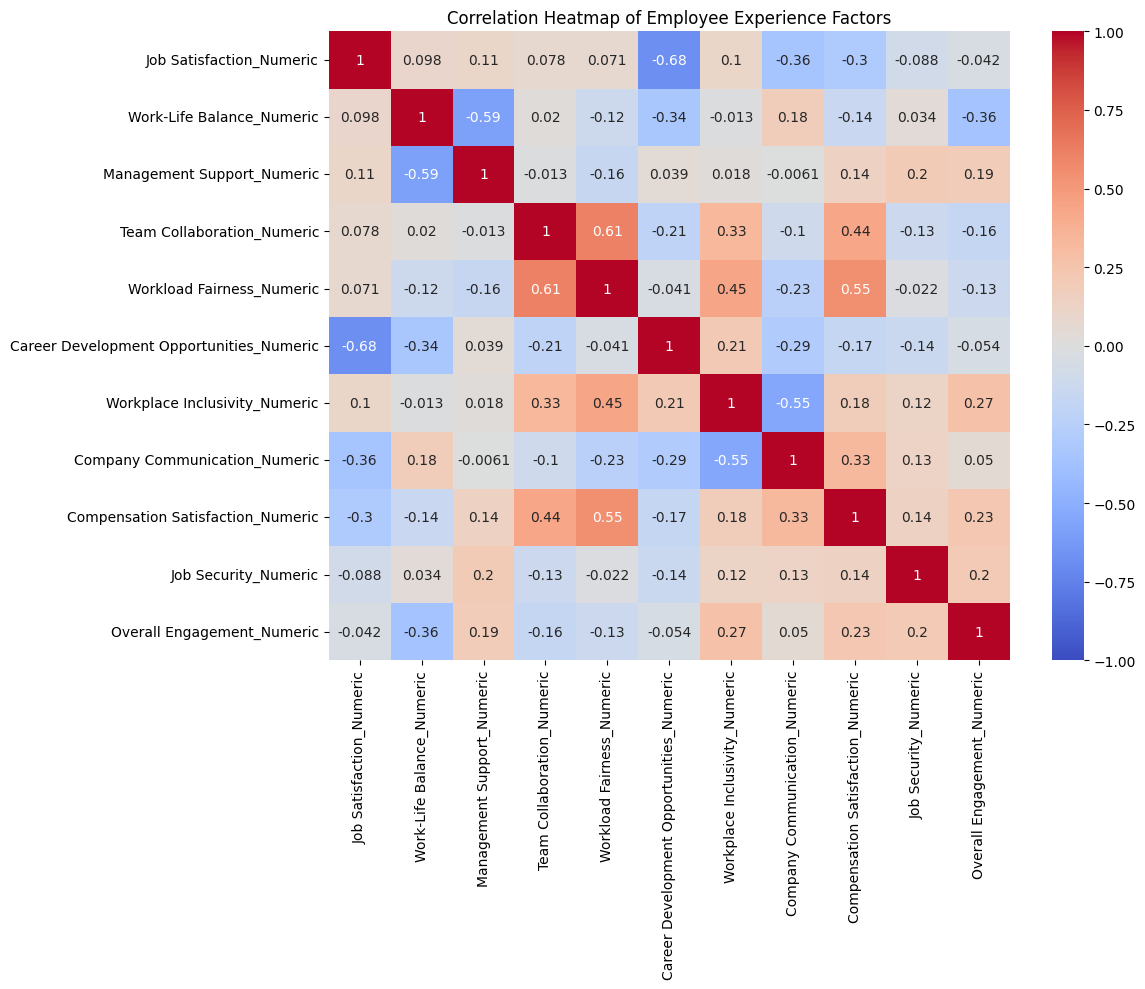

In [7]:
# Heatmap of correlations between different factors
correlation_matrix = df[[col + '_Numeric' for col in likert_columns]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Employee Experience Factors')
plt.tight_layout()
plt.show()

In [12]:
# Calculate the correlation between Work-Life Balance and Overall Engagement
correlation, p_value = stats.pearsonr(df['Work-Life Balance_Numeric'], df['Overall Engagement_Numeric'])

# Print the results of the correlation analysis
print(f"Correlation between Work-Life Balance and Overall Engagement:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

Correlation between Work-Life Balance and Overall Engagement:
Correlation coefficient: -0.3610
p-value: 0.1861


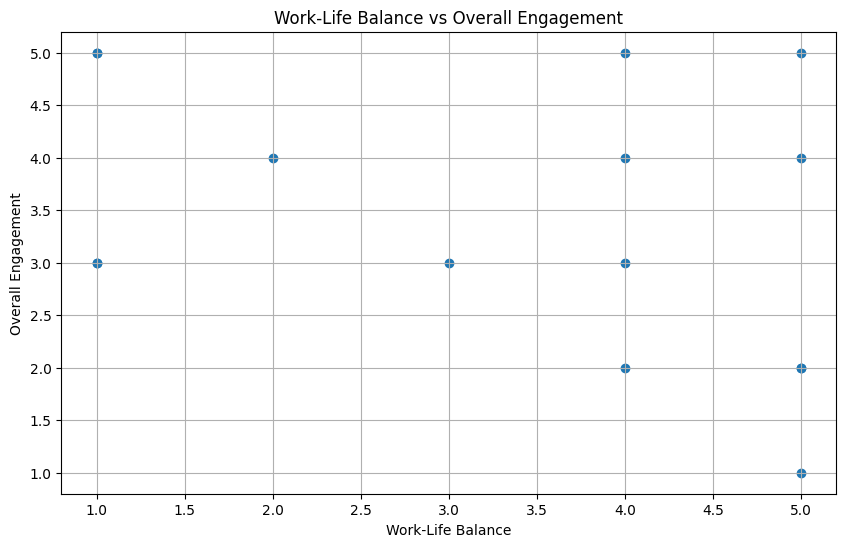

In [13]:
# Create a scatter plot to visualize the relationship between Work-Life Balance and Overall Engagement
plt.figure(figsize=(10, 6))
plt.scatter(df['Work-Life Balance_Numeric'], df['Overall Engagement_Numeric'])
plt.title('Work-Life Balance vs Overall Engagement')
plt.xlabel('Work-Life Balance')
plt.ylabel('Overall Engagement')
plt.grid(True)
plt.show()

In [14]:
# Count how many employees are in each department
print(df['Department'].value_counts())

Sales                  4
Product Development    3
Consulting             2
HR                     2
Operations             1
IT                     1
Design                 1
Finance                1
Name: Department, dtype: int64


In [15]:
# Calculate average job satisfaction for each department
dept_satisfaction = df.groupby('Department')['Job Satisfaction_Numeric'].agg(['mean', 'count', 'std'])
display(dept_satisfaction)

,mean,count,std
Department,,,
Consulting,3.000000,2,0.000000
Design,5.000000,1,NaN
Finance,4.000000,1,NaN
HR,4.000000,2,1.414214
IT,1.000000,1,NaN
Operations,2.000000,1,NaN
Product Development,2.666667,3,1.154701
Sales,2.750000,4,1.500000


In [16]:
# Find the two departments with the most employees
top_depts = dept_satisfaction.nlargest(2, 'count').index

# If there are at least two departments with data, compare their job satisfaction
if len(top_depts) == 2:
    dept1, dept2 = top_depts
    dept1_satisfaction = df[df['Department'] == dept1]['Job Satisfaction_Numeric']
    dept2_satisfaction = df[df['Department'] == dept2]['Job Satisfaction_Numeric']
    
    # Perform a statistical test to compare job satisfaction between the two departments
    t_stat, p_value = stats.ttest_ind(dept1_satisfaction, dept2_satisfaction)
    
    # Print the results of the statistical test
    print(f"\nHypothesis Test: Job Satisfaction comparison between {dept1} and {dept2}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
else:
    print("Not enough departments with sufficient data for comparison.")


Hypothesis Test: Job Satisfaction comparison between Sales and Product Development
t-statistic: 0.0795
p-value: 0.9397


In [23]:
# Set pandas display options for better formatting
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate and print summary statistics for Overall Engagement and Job Satisfaction
for column in ['Overall Engagement_Numeric', 'Job Satisfaction_Numeric']:
    print(f"\nDescriptive Statistics for {column}:")
    desc_stats = df[column].describe()
    
    # Add mode to the description
    mode_value = df[column].mode().values[0]
    desc_stats['Mode'] = mode_value
    
    # Rename index for clarity
    desc_stats.index = ['Count', 'Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max', 'Mode']
    
    # Format the output
    print(desc_stats.to_string())
    print("-" * 60)


Descriptive Statistics for Overall Engagement_Numeric:
Count     15.00
Mean       3.40
Std Dev    1.30
Min        1.00
25%        2.50
Median     3.00
75%        4.50
Max        5.00
Mode       3.00
------------------------------------------------------------

Descriptive Statistics for Job Satisfaction_Numeric:
Count     15.00
Mean       3.00
Std Dev    1.31
Min        1.00
25%        2.00
Median     3.00
75%        4.00
Max        5.00
Mode       2.00
------------------------------------------------------------


In [18]:
# Calculate average job satisfaction for each age group
age_satisfaction = df.groupby('Age Bracket')['Job Satisfaction_Numeric'].agg(['mean', 'count', 'std'])
print("\nJob Satisfaction by Age Bracket:")
print(age_satisfaction)


Job Satisfaction by Age Bracket:
                 mean  count       std
Age Bracket                           
18-24        3.428571      7  1.397276
25-34        3.000000      3  1.732051
35-44        2.000000      2  1.414214
45-54        2.666667      3  0.577350


In [22]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate average Work-Life Balance and Compensation Satisfaction for different demographic groups
for demographic in ['Age Bracket', 'Gender', 'Ethnicity']:
    for metric in ['Work-Life Balance_Numeric', 'Compensation Satisfaction_Numeric']:
        print(f"\n{metric} by {demographic}:")
        result = df.groupby(demographic)[metric].agg(['mean', 'count', 'std'])
        result = result.rename(columns={'mean': 'Average', 'count': 'Count', 'std': 'Std Dev'})
        print(result.to_string(justify='center'))
        print("-" * 50)


Work-Life Balance_Numeric by Age Bracket:
             Average  Count  Std Dev
Age Bracket                         
18-24         3.14      7     1.77  
25-34         4.67      3     0.58  
35-44         4.50      2     0.71  
45-54         1.67      3     1.15  
--------------------------------------------------

Compensation Satisfaction_Numeric by Age Bracket:
             Average  Count  Std Dev
Age Bracket                         
18-24         2.43      7     0.79  
25-34         3.33      3     1.53  
35-44         2.50      2     2.12  
45-54         3.00      3     1.00  
--------------------------------------------------

Work-Life Balance_Numeric by Gender:
        Average  Count  Std Dev
Gender                         
Female   3.11      9     1.83  
Male     3.67      6     1.51  
--------------------------------------------------

Compensation Satisfaction_Numeric by Gender:
        Average  Count  Std Dev
Gender                         
Female   2.89      9     1.17  
M

In [20]:
# Print the details and results of the statistical test comparing job satisfaction between departments
print("\nHypothesis Test:")
print("Null Hypothesis: There is no significant difference in Job Satisfaction between Sales and Product Development departments.")
print("Alternative Hypothesis: There is a significant difference in Job Satisfaction between Sales and Product Development departments.")
print("Test Method: Independent samples t-test")
print(f"Results: t-statistic = 0.0795, p-value = 0.9397")
print("Conclusion: We fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in Job Satisfaction between the two departments.")


Hypothesis Test:
Null Hypothesis: There is no significant difference in Job Satisfaction between Sales and Product Development departments.
Alternative Hypothesis: There is a significant difference in Job Satisfaction between Sales and Product Development departments.
Test Method: Independent samples t-test
Results: t-statistic = 0.0795, p-value = 0.9397
Conclusion: We fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in Job Satisfaction between the two departments.


In [21]:
# Print the results of the correlation analysis between Work-Life Balance and Overall Engagement
print("\nCorrelation Analysis:")
print("Correlation between Work-Life Balance and Overall Engagement:")
print(f"Correlation coefficient: -0.3610")
print(f"p-value: 0.1861")
print("Interpretation: There is a moderate negative correlation between Work-Life Balance and Overall Engagement. However, this correlation is not statistically significant (p > 0.05). This suggests that while there might be a tendency for Overall Engagement to decrease as Work-Life Balance improves, we cannot confidently conclude that this relationship exists in the broader population based on this sample.")


Correlation Analysis:
Correlation between Work-Life Balance and Overall Engagement:
Correlation coefficient: -0.3610
p-value: 0.1861
Interpretation: There is a moderate negative correlation between Work-Life Balance and Overall Engagement. However, this correlation is not statistically significant (p > 0.05). This suggests that while there might be a tendency for Overall Engagement to decrease as Work-Life Balance improves, we cannot confidently conclude that this relationship exists in the broader population based on this sample.
